In [63]:
import tensorflow as tf

In [64]:
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

In [65]:
# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [66]:
import numpy as np

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

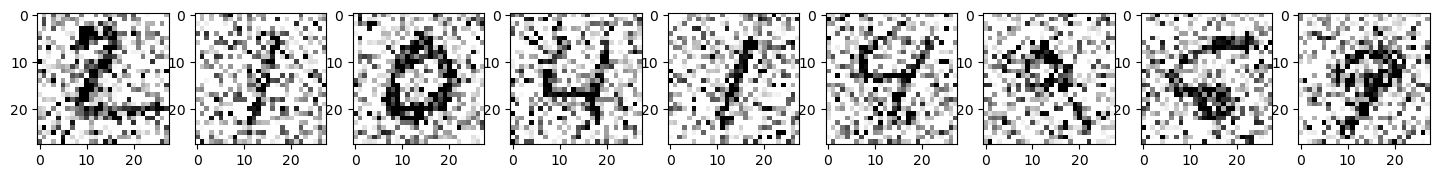

In [67]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [68]:
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same')
])

In [69]:
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(1, (3, 3), activation='relu', padding='same')
])

In [70]:
autoencoder = tf.keras.models.Sequential([encoder, decoder])

In [71]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [72]:
autoencoder.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_13 (Sequential)      │ (None, 4, 4, 8)        │         6,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_14 (Sequential)      │ (None, 28, 28, 1)      │         6,681 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,785 (49.94 KB)

 Trainable params: 12,785 (49.94 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - loss: 0.0645 - val_loss: 0.0408
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.0389 - val_loss: 0.0330
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0324 - val_loss: 0.0301
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0295 - val_loss: 0.0275
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0275 - val_loss: 0.0265
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0262 - val_loss: 0.0248
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 0.0250 - val_loss: 0.0239
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0243 - val_loss: 0.0232
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - loss: 0.0235 - val_loss: 0.0239
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.0232 - val_loss: 0.0223


In [74]:
autoencoder.evaluate(x_test_noisy, x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0224


0.022311870008707047

In [75]:
no_noise_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


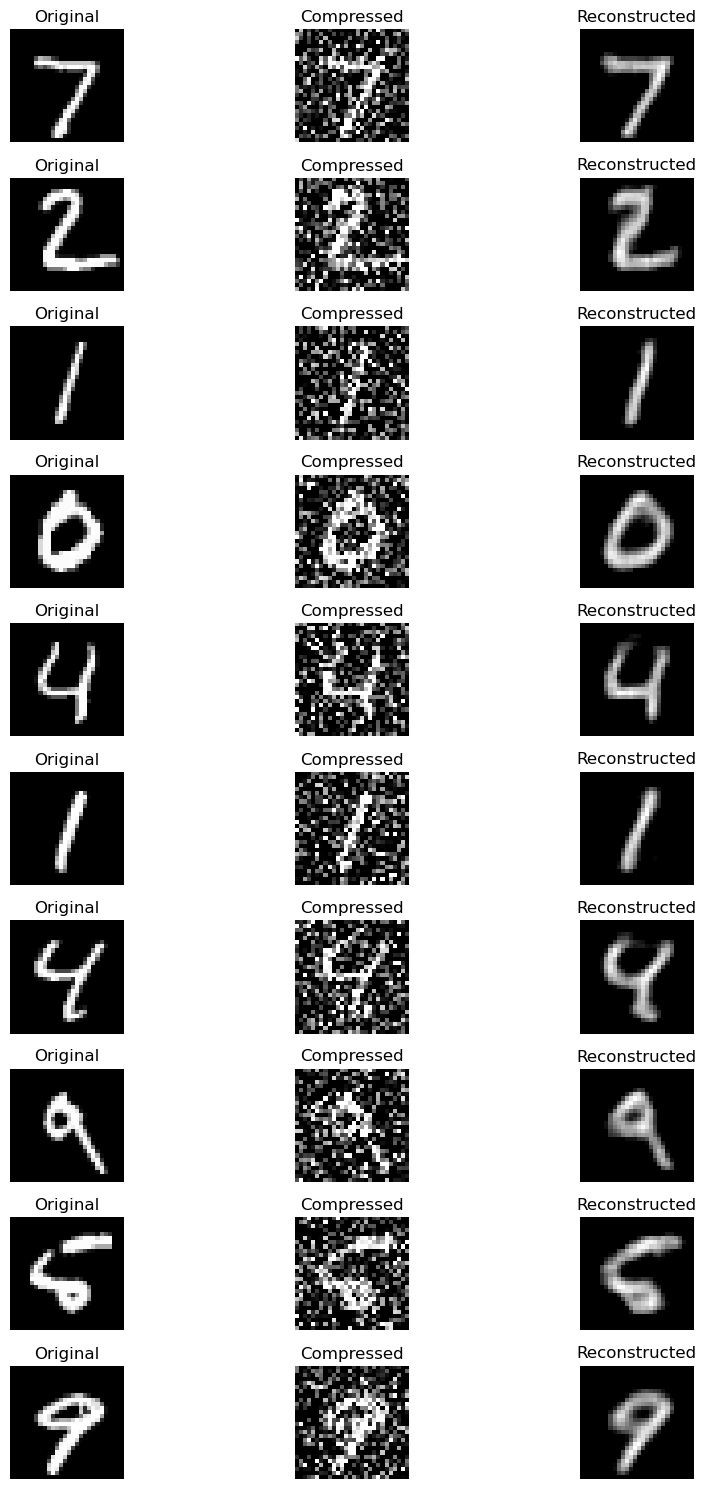

In [79]:
n = 10

plt.figure(figsize=(10, 15))

for i in range(n):
    # Display original images
    ax = plt.subplot(n, 3, 3 * i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display compressed images
    ax = plt.subplot(n, 3, 3 * i + 2)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')  # Adjust the shape for visualization
    plt.title("Compressed")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(n, 3, 3 * i + 3)
    plt.imshow(no_noise_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()